In [1]:
from __future__ import division, print_function

import time
import os
import subprocess

import numpy as np
import matplotlib.pyplot as plt

import sncosmo
from astropy.table import Table

# Used to normalise features
from sklearn.preprocessing import StandardScaler 
# Used for hyperparameter optimisation and to avoid overfitting
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
# Some example algorithms you can try using (sklearn has many more)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
%matplotlib inline

In [2]:
sn_machine='/Users/mariavincenzi/PhD/SNChallenge/supernova-machine/'

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import time

import sys
import os
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
max_ml_algorithms_file=sn_machine+'max_ml_algorithms.py'
sys.path.append(os.path.dirname(os.path.expanduser(max_ml_algorithms_file)))
import max_ml_algorithms as ml_algorithms#, max_tools as tools
max_tools_file=sn_machine+'max_tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(max_tools_file)))
import max_tools as tools
mine_file=sn_machine+'maria_gp_wvl_decomp.py'
sys.path.append(os.path.dirname(os.path.expanduser(mine_file)))
import maria_gp_wvl_decomp as mine

/Users/mariavincenzi/anaconda2_7/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mariavincenzi/anaconda2_7/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/mariavincenzi/anaconda2_7/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This 

In [3]:
from astropy.io import ascii
mypath='/Users/mariavincenzi/PhD/SNChallenge/DES_BLIND+HOSTZ/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)))&(f[-3:]=='DAT')]

In [4]:
def prepare_lc(filename):
    data=np.genfromtxt(mypath+filename, names=True, skip_header=22, skip_footer=1,
                   dtype=None, comments='DETECTION', usecols=[1,2,4,5])
    filter_list=['des'+i for i in data['FLT']]
    mjd_fromfirst=[d-data['MJD'][0] for d in data['MJD']]

    lc=Table(data, names=['general_mjd', 'single_filter','flux', 'flux_error'])
    zp=np.ones(len(data))*(27.5)
    zpsys=(['ab' for i in range(len(data))])
    lc.add_columns([Table.Column(name='mjd', data=mjd_fromfirst), \
                Table.Column(name='filter', data=filter_list), \
                Table.Column(name='zp', data=zp), \
                Table.Column(name='zpsys', data=zpsys)])
    return lc

In [5]:
lc_ready=prepare_lc(onlyfiles[20])

In [28]:
df_labels=['f_%i'%(feature+1.) for feature in range(400)]
df_g = pd.DataFrame(columns=df_labels)
df_r = pd.DataFrame(columns=df_labels)
df_i = pd.DataFrame(columns=df_labels)
df_z = pd.DataFrame(columns=df_labels)

In [37]:
row_count=0
for file_ in onlyfiles[:200]:
    lc_ready=prepare_lc(file_)
    res=mine.GPonLC(lc_ready)
    if np.max(np.array(res['gband'][1]))>50.:
        RES=res
        coeff_g, coeff_r, coeff_i, coeff_z=mine.wlt_decomp(res)
        df_g.loc[row_count] = np.array(coeff_g).flatten()
        df_r.loc[row_count] = np.array(coeff_r).flatten()
        df_i.loc[row_count] = np.array(coeff_i).flatten()
        df_z.loc[row_count] = np.array(coeff_z).flatten()
        row_count=row_count+1
    

In [60]:
len(df_g)

30

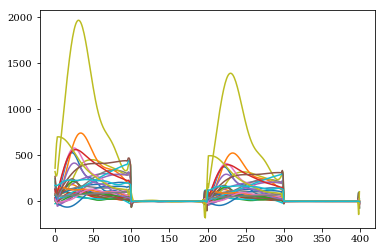

In [71]:
for i in range(len(df_i)):
    p=plt.plot((df_i.values[i]))


In [80]:
eigenvals_g, eigenvect_ = tools.pca(df_g.values)

tools.best_coeffs((eigenvals_g**2)**0.5)

eigenvals_i, eigenvect_ = tools.pca(df_i.values)



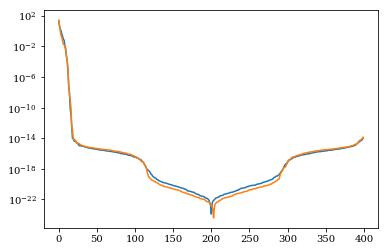

In [81]:
plt.plot(np.arange(0,400,1),(eigenvals_g**2)**0.5)
plt.plot(np.arange(0,400,1),(eigenvals_i**2)**0.5)


plt.yscale('log')

In [58]:
sum(eigenvals_)

74.999999999999972

In [56]:
import pywt

wavelet_object = pywt.Wavelet('sym2')
coeff_g = np.array(pywt.swt(RES['gband'][1], wavelet_object))
inversed_signal= tools.iswt(coeff_g, wavelet_object)



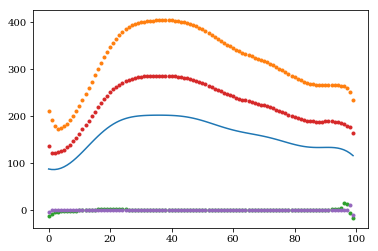

In [68]:
plt.plot(RES['zband'][1])

plt.plot(coeff_z[0][0], '.')
plt.plot(coeff_z[0][1], '.')
plt.plot(coeff_z[1][0], '.')
plt.plot(coeff_z[1][1], '.')
#plt.ylim(-10,5)

In [39]:
len(lc_ready['flux'][np.where(lc_ready['single_filter']=='g')])

30

In [16]:
feat_g=tools.iswt(coeff_g, wavelet_object)
feat_r=tools.iswt(coeff_r, wavelet_object)
feat_i=tools.iswt(coeff_i, wavelet_object)
feat_z=tools.iswt(coeff_z, wavelet_object)


In [17]:
feat_g.shape

(100,)

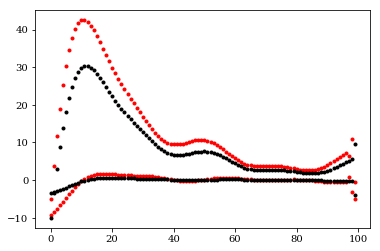

In [193]:
plt.plot(coeff_r[0][0], '.r')
plt.plot(coeff_r[0][1], '.r')
plt.plot(coeff_r[1][0], '.k')
plt.plot(coeff_r[1][1], '.k')


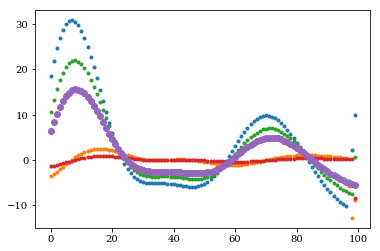

In [38]:
plt.plot(coeff_g[0][0], '.')
plt.plot(coeff_g[0][1], '.')
plt.plot(coeff_g[1][0], '.')
plt.plot(coeff_g[1][1], '.')
plt.plot(feat_g, 'o')

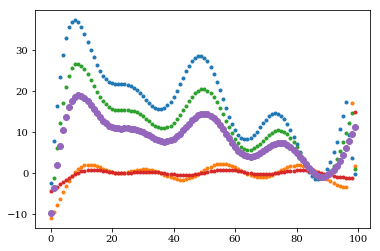

In [40]:
plt.plot(coeff_i[0][0], '.')
plt.plot(coeff_i[0][1], '.')
plt.plot(coeff_i[1][0], '.')
plt.plot(coeff_i[1][1], '.')
plt.plot(feat_i, 'o')

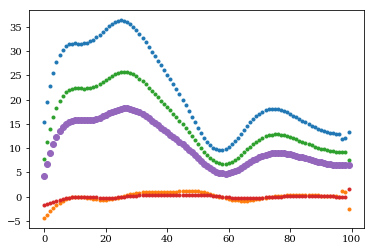

In [41]:
plt.plot(coeff_z[0][0], '.')
plt.plot(coeff_z[0][1], '.')
plt.plot(coeff_z[1][0], '.')
plt.plot(coeff_z[1][1], '.')
plt.plot(feat_z, 'o')

In [42]:
tools.pca()

TypeError: pca() takes exactly 1 argument (0 given)

In [195]:
coeff_i=np.array(coeff_i)

In [196]:
obs_features=[]
for i in range(coeff_i.shape[2]):
    obs_features.append(coeff_i[:,:,i].reshape(coeff_i.shape[0]+coeff_i.shape[1],))
obs_features=np.array(obs_features)

In [90]:
coeff_g.shape[2]

100

In [197]:
obs_features.shape

(100, 4)

In [198]:
PCA_res=tools.pca(obs_features.T)

In [199]:
eigvals_, eigvectors_ = PCA_res

In [201]:
eigvals_
tools.best_coeffs(eigvals_)

2

In [159]:
eigvectors_

matrix([[ -2.49574341e-01,   8.31449988e-01,   1.25786793e-01, ...,
           0.00000000e+00,   1.38811263e-01,  -1.54455980e-02],
        [ -2.03770583e-01,   2.25638576e-03,  -7.69116171e-02, ...,
          -1.31589686e-02,  -3.98009562e-01,  -3.10872350e-02],
        [ -1.97829927e-01,  -1.72865628e-01,   2.14464884e-02, ...,
           3.98671647e-02,   2.66196532e-01,   5.65717851e-01],
        ..., 
        [  8.34603259e-02,  -3.01719045e-01,   5.23142796e-01, ...,
          -3.92847073e-02,   2.95318631e-01,  -7.77757658e-02],
        [ -8.86994216e-03,  -2.62997071e-01,   1.97829530e-01, ...,
          -3.00979391e-02,  -1.39197696e-01,  -8.50663993e-02],
        [ -1.66128278e-01,  -2.46293606e-01,  -7.46583766e-01, ...,
          -7.28634794e-04,   1.81540944e-01,  -1.24528663e-01]])

In [150]:
def pca_coeffs_try(X, eigs):
    import pywt, os, math, time
    from pylab import *
    from sklearn import *
   # print shape(mat(eigs)), shape(mat(X).T)
    t1=time.time()
#    try:
    print (eigs, mat(X).T)
    A=linalg.lstsq(mat(eigs), mat(X).T)[0]
    print (A, shape(A))
    B=A.flatten()
#    except ValueError:
#        print eigs
#    print 'time for ls', time.time()-t1
    print (shape(B), B)
    return B


<ipython-input-150-cbf9e075f087>:1: SyntaxWarning: import * only allowed at module level
  def pca_coeffs_try(X, eigs):
<ipython-input-150-cbf9e075f087>:1: SyntaxWarning: import * only allowed at module level
  def pca_coeffs_try(X, eigs):


In [161]:
obs

array([ 21.38752862,  -4.63096821,   7.02276609,   4.20976263])

In [160]:
pca_coeffs_try(obs, eigvectors_.T)

[[ -2.49574341e-01  -2.03770583e-01  -1.97829927e-01 ...,   8.34603259e-02
   -8.86994216e-03  -1.66128278e-01]
 [  8.31449988e-01   2.25638576e-03  -1.72865628e-01 ...,  -3.01719045e-01
   -2.62997071e-01  -2.46293606e-01]
 [  1.25786793e-01  -7.69116171e-02   2.14464884e-02 ...,   5.23142796e-01
    1.97829530e-01  -7.46583766e-01]
 ..., 
 [  0.00000000e+00  -1.31589686e-02   3.98671647e-02 ...,  -3.92847073e-02
   -3.00979391e-02  -7.28634794e-04]
 [  1.38811263e-01  -3.98009562e-01   2.66196532e-01 ...,   2.95318631e-01
   -1.39197696e-01   1.81540944e-01]
 [ -1.54455980e-02  -3.10872350e-02   5.65717851e-01 ...,  -7.77757658e-02
   -8.50663993e-02  -1.24528663e-01]] [[ 21.38752862]
 [ -4.63096821]
 [  7.02276609]
 [  4.20976263]]


LinAlgError: Incompatible dimensions

In [162]:
measure_pca_coeffs=[]

for obs in obs_features.T:
    measure_pca_coeffs.append(tools.pca_coeffs(obs, eigvectors_.T))

In [165]:
coefff = tools.pca_coeffs(obs, eigvectors_)

In [190]:
tools.best_coeffs(coefff_list)

0

In [189]:
sum(coefff_list)

-8.811583016529504

In [187]:
coefff_list=coefff.tolist()[0]